# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajƒôciach nale≈ºy wykonaƒá poni≈ºsze zadania, a nastƒôpnie sporzƒÖdziƒá sprawozdanie zawierajƒÖce odpowiedzi z komentarzami.

**Cel zajƒôƒá:**  
Celem zajƒôƒá jest zapoznanie siƒô z metodami ca≈Çkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, nale≈ºy wyznaczyƒá warto≈õƒá ca≈Çki tej funkcji na przedziale $a$,$b$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 
import scipy as sp

***Zadanie 1.***    
Wyznacz numerycznie warto≈õƒá ca≈Çki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj nastƒôpujƒÖce czynno≈õci:

1. Czy mo≈ºliwe jest ca≈Çkowanie podanej funkcji na dowolnym przedziale? SwojƒÖ odpowied≈∫ uzasadnij.
2. Oblicz ca≈Çkƒô numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy nastƒôpujƒÖcych metod:  
    1. Metoda Trapez√≥w - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawd≈∫ jak wyniki r√≥≈∫niƒÖ siƒô od siebie, czy ma na nie wp≈Çyw d≈Çugo≈õƒá wektora $\mathbf{y}$ oraz warto≈õƒá parametru $dx$

3. Por√≥wnaj wyniki i czas oblicze≈Ñ z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

<ipython-input-2-6319ea693027>:1: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(1+np.tan(x))


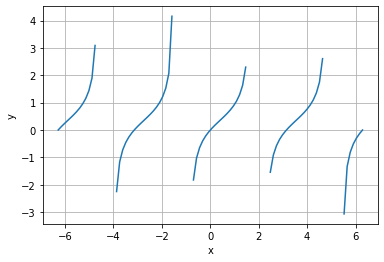

In [2]:
f = lambda x: np.log(1+np.tan(x))
x = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(x,f(x))
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

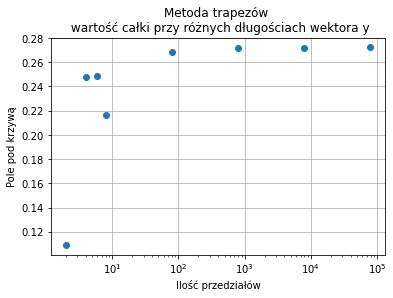

In [3]:
#metoda trapezow
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.log(1+np.tan(x))
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,np.pi/4,i)
    inte = sp.integrate.trapz(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda trapez√≥w \n warto≈õƒá ca≈Çki przy r√≥≈ºnych d≈Çugo≈õciach wektora y")
plt.ylabel("Pole pod krzywƒÖ")
plt.xlabel("Ilo≈õƒá przedzia≈Ç√≥w")
plt.grid(True)
plt.show()

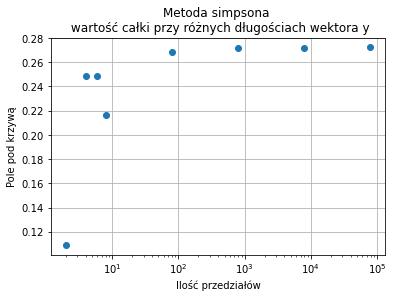

In [4]:
#metoda Simpsona
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.log(1+np.tan(x))
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,np.pi/4,i)
    inte = sp.integrate.simps(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda simpsona \n warto≈õƒá ca≈Çki przy r√≥≈ºnych d≈Çugo≈õciach wektora y")
plt.ylabel("Pole pod krzywƒÖ")
plt.xlabel("Ilo≈õƒá przedzia≈Ç√≥w")
plt.grid(True)
plt.show()

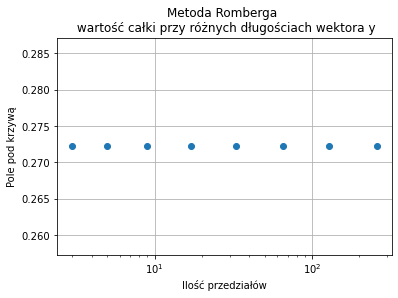

In [5]:
#metoda Romberga
dx=range(1,9)
f=lambda x:np.log(1+np.tan(x))
rozw=[]
len_y=[]
for i in dx:
    x=np.linspace(0,np.pi/4,num=2**i+1)
    g=((np.pi/4)/(2**i))
    inte = sp.integrate.romb(f(x),g)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda Romberga \n warto≈õƒá ca≈Çki przy r√≥≈ºnych d≈Çugo≈õciach wektora y")
plt.ylabel("Pole pod krzywƒÖ")
plt.xlabel("Ilo≈õƒá przedzia≈Ç√≥w")
plt.grid(True)
plt.show()

In [6]:
f = lambda x:np.log(1+np.tan(x))
quadrature,q_err=scipy.integrate.quadrature(f,0,np.pi/4)
print(quadrature,q_err)

0.27219826128795027 5.551115123125783e-17


In [7]:
f = lambda x:np.log(1+np.tan(x))
romberg = scipy.integrate.romberg(f,0,np.pi/4)
print(romberg)

0.27219826128795016


In [8]:
f = lambda x:np.log(1+np.tan(x))
quad,quad_err=scipy.integrate.quad(f,0,np.pi/4)
print(quad,quad_err)

0.27219826128795027 3.022007769448168e-15


R√≥≈ºnica z quad bo daje najmniejszy b≈ÇƒÖd:

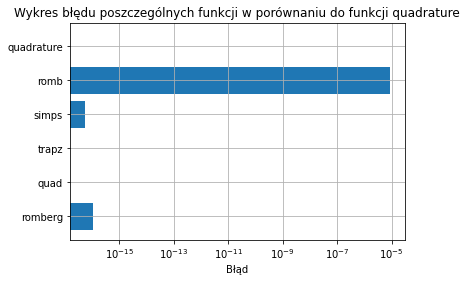

In [9]:
x = np.linspace(0,np.pi/4,2**15+1)
trapz=sp.integrate.trapz(f(x),x)
simps=sp.integrate.simps(f(x),x)
romb = sp.integrate.romb(f(x),dx=np.pi/4/(2**15+1))
quadrature,q_err = scipy.integrate.quad(f,0,np.pi/4)
romberg = scipy.integrate.romberg(f,0,np.pi/4)

labels=['romberg','quad','trapz','simps','romb','quadrature']
rozn = np.abs(quadrature-np.array([romberg,quad,trapz,simps,romb,quadrature]))
x1 = np.arange(6)
plt.barh(x1,rozn)
plt.yticks(x1,labels)
plt.xscale('log')
plt.title("Wykres b≈Çƒôdu poszczeg√≥lnych funkcji w por√≥wnaniu do funkcji quadrature")
plt.xlabel('B≈ÇƒÖd')
plt.grid(True)
plt.show()

Czasy wykonania

In [10]:
%%timeit -r 100 -n 100
#trapz
x=np.linspace(0,np.pi/4,2**10+1)
trapz=sp.integrate.trapz(f(x),x)

142 ¬µs ¬± 30.1 ¬µs per loop (mean ¬± std. dev. of 100 runs, 100 loops each)


In [11]:
%%timeit -r 100 -n 100
#simps
x=np.linspace(0,np.pi/4,2**10+1)
simps=sp.integrate.simps(f(x),x)

194 ¬µs ¬± 21.9 ¬µs per loop (mean ¬± std. dev. of 100 runs, 100 loops each)


In [12]:
%%timeit -r 100 -n 100
#romb
x=np.linspace(0,np.pi/4,2**10+1)
romb=sp.integrate.romb(f(x),dx=np.pi/4/(2**10+1))

324 ¬µs ¬± 52.8 ¬µs per loop (mean ¬± std. dev. of 100 runs, 100 loops each)


In [13]:
%%timeit -r 100 -n 100
#quadrature
quadrature,q_err=scipy.integrate.quadrature(f,0,np.pi/4)

77.1 ¬µs ¬± 13.7 ¬µs per loop (mean ¬± std. dev. of 100 runs, 100 loops each)


In [14]:
%%timeit -r 100 -n 100
#romberg
romberg=scipy.integrate.romberg(f,0,np.pi/4)

66.3 ¬µs ¬± 14.5 ¬µs per loop (mean ¬± std. dev. of 100 runs, 100 loops each)


In [15]:
%%timeit -r 100 -n 100
#quad
quad,quad_err=scipy.integrate.quad(f,0,np.pi/4)

106 ¬µs ¬± 11.7 ¬µs per loop (mean ¬± std. dev. of 100 runs, 100 loops each)


***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie warto≈õc ca≈Çki na przedziale $a = 0$, $b=1$  w  taki sam spos√≥b jak w zadaniu 1.

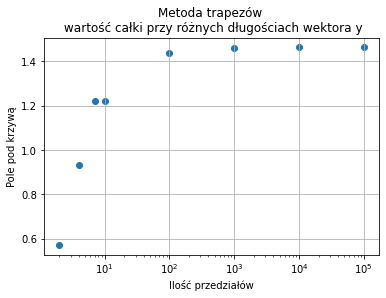

In [18]:
#metoda trapezow
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.exp(x**2)
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,1,i)
    inte = sp.integrate.trapz(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda trapez√≥w \n warto≈õƒá ca≈Çki przy r√≥≈ºnych d≈Çugo≈õciach wektora y")
plt.ylabel("Pole pod krzywƒÖ")
plt.xlabel("Ilo≈õƒá przedzia≈Ç√≥w")
plt.grid(True)
plt.show()

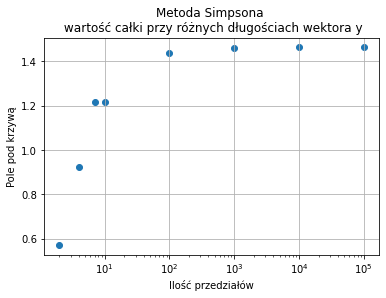

In [22]:
#metoda trapezow
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.exp(x**2)
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,1,i)
    inte = sp.integrate.simps(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda Simpsona \n warto≈õƒá ca≈Çki przy r√≥≈ºnych d≈Çugo≈õciach wektora y")
plt.ylabel("Pole pod krzywƒÖ")
plt.xlabel("Ilo≈õƒá przedzia≈Ç√≥w")
plt.grid(True)
plt.show()

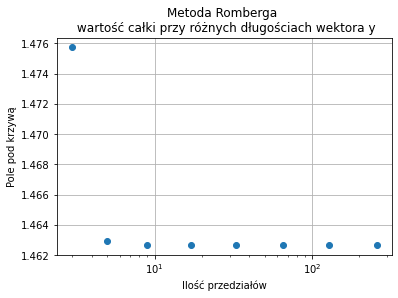

In [21]:
#metoda Romberga
dx=range(1,9)
f=lambda x:np.exp(x**2)
rozw=[]
len_y=[]
for i in dx:
    x=np.linspace(0,1,num=2**i+1)
    g=((1-0)/(2**i))
    inte = sp.integrate.romb(f(x),g)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda Romberga \n warto≈õƒá ca≈Çki przy r√≥≈ºnych d≈Çugo≈õciach wektora y")
plt.ylabel("Pole pod krzywƒÖ")
plt.xlabel("Ilo≈õƒá przedzia≈Ç√≥w")
plt.grid(True)
plt.show()

In [23]:
f = lambda x:np.exp(x**2)
quadrature,q_err=scipy.integrate.quadrature(f,0,1)
print(quadrature,q_err)

1.4626517458962958 9.92098181384904e-10


In [24]:
f = lambda x:np.exp(x**2)
romberg=scipy.integrate.romberg(f,0,1)
print(romberg)

1.4626517459101032


In [26]:
f = lambda x:np.exp(x**2)
quad,quad_err=scipy.integrate.quad(f,0,1)
print(quad,quad_err)

1.4626517459071815 1.623869645314337e-14


Wnioski:  
Mo≈ºliwe jest wykonanie ca≈Çki na zadanym przediale ùëéùëè‚àà(0,ùúã/4 ) poniewa≈º funkcja jest na tym przedziale ograniczona, ciƒÖg≈Ça i r√≥≈ºniczkowalna.Warto≈õƒá dx oznacza odstƒôp pomiƒôdzy punktami wektora y. Je≈ºeli warto≈õƒá bƒôdzie za du≈ºa dostaniemy z≈Çy wynik ca≈Çki. Geometrycznie oznacza to, ≈ºe wykres zosta≈Ç ≈õci≈õniƒôty lub rozciƒÖgniƒôty na osi x. Wszystkie funkcje zwr√≥ci≈Çy poprawnƒÖ warto≈õƒá przy dobrych przedzia≈Çach.‚Ä¢Na tych laboratoriach pozna≈Çem metody obliczania ca≈Çek oznaczonych. B≈Çƒôdy oblicze≈Ñ zale≈ºƒÖ od kilku czynnik√≥w: od d≈Çugo≈õci przedzia≈Çu, od metody przyjƒôtej do oblicze≈Ñ a tak≈ºe samej funkcji. Metody numeryczne dajƒÖ nam okazjƒô policzyƒá ca≈Çki z funkcji kt√≥rych analitycznie nie ma mo≈ºliwo≈õƒái rozwiƒÖzaƒá. Niestety musimy sie liczyƒá z b≈Çƒôdami oblicze≈Ñ, jednak na ten moment zadana dok≈Çadno≈õƒá jest w pe≈Çni akceptowalna i pozwala bardzo dobrze przybli≈ºyƒá rozwiƒÖzanie danego problemu.